In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import matplotlib.pyplot as plt

In [10]:
df_train=pd.read_csv("fashion-mnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_test=pd.read_csv("fashion-mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
trainX=df_train.drop(['label'],axis=1)
trainY=df_train['label']
testX=df_train.drop(['label'],axis=1)
testY=df_train['label']

In [26]:
# import tensorflow as tf
# (trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()



In [27]:
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Reshape the input data to the required shape (28, 28, 1)
x_train_reshaped = trainX.values.reshape(-1, 28, 28, 1)
x_test_reshaped = trainX.values.reshape(-1, 28, 28, 1)

In [28]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\SUYOG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(x_train_reshaped,trainY,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7739 - loss: 0.6578 - val_accuracy: 0.8181 - val_loss: 0.5090
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8541 - loss: 0.4004 - val_accuracy: 0.8668 - val_loss: 0.3714
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8716 - loss: 0.3501 - val_accuracy: 0.8731 - val_loss: 0.3545
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8811 - loss: 0.3250 - val_accuracy: 0.8721 - val_loss: 0.3605
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8862 - loss: 0.3037 - val_accuracy: 0.8741 - val_loss: 0.3582


In [38]:
import matplotlib.pyplot as plt
# To know the labels list
def check_label(id_,labels):
    label = trainY[id_]
    if label not in labels:
        plt.imshow(x_train_reshaped[id_])
        print(label)
        plt.show()
    return label

2


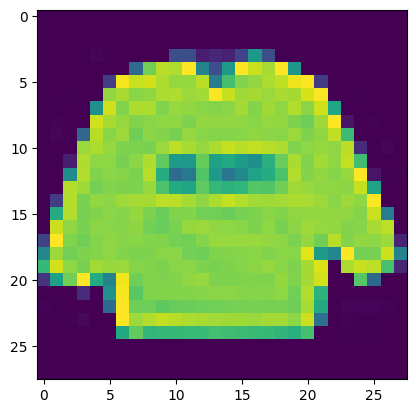

9


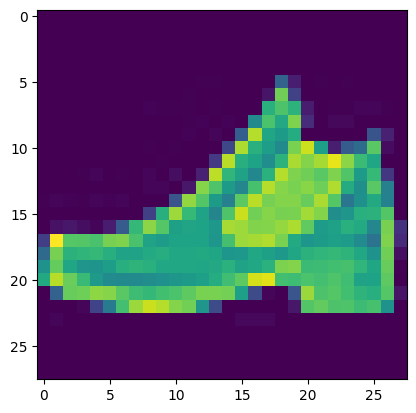

6


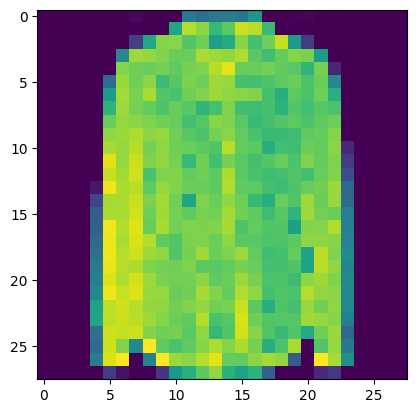

0


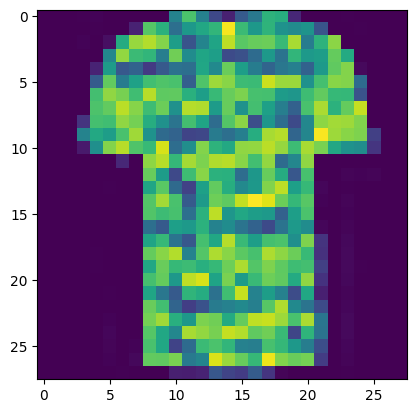

3


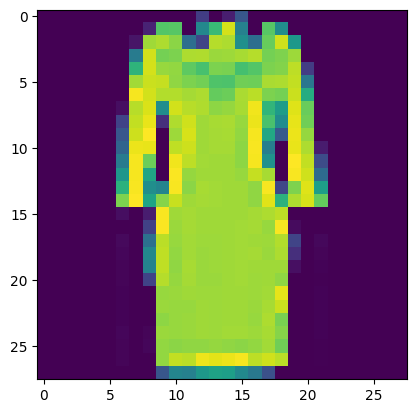

4


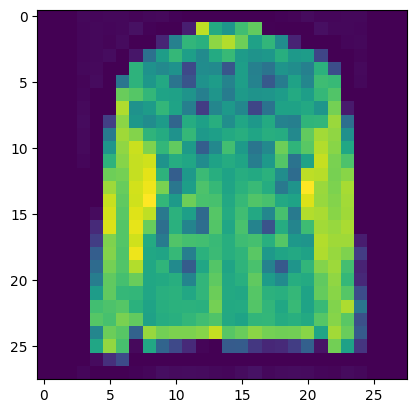

5


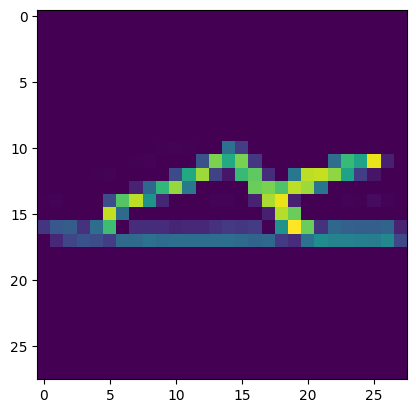

8


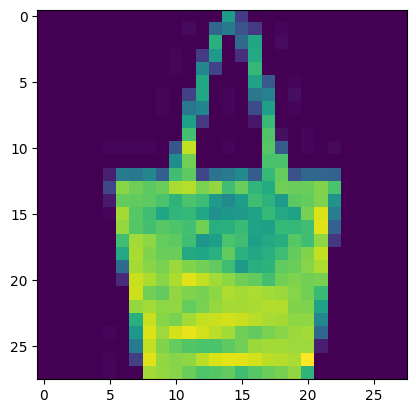

7


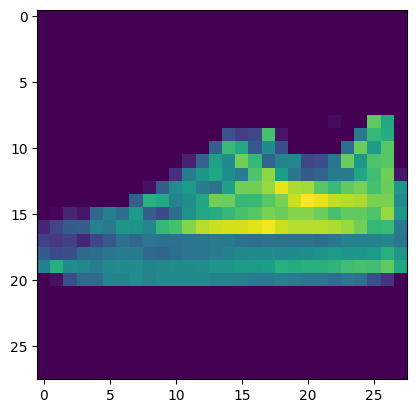

1


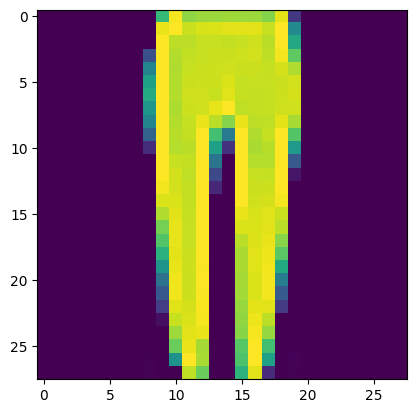

In [39]:
#To know unqiue Labels 
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [44]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(x_test_reshaped[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(x_test_reshaped[id_])
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
coat


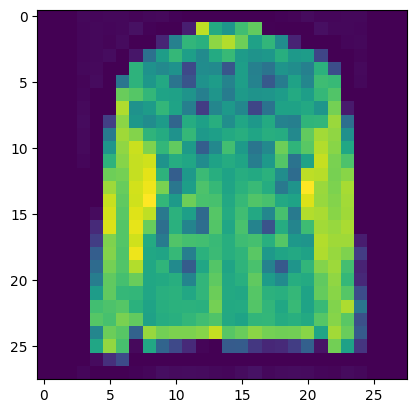

In [45]:
predict(5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
t_shirt


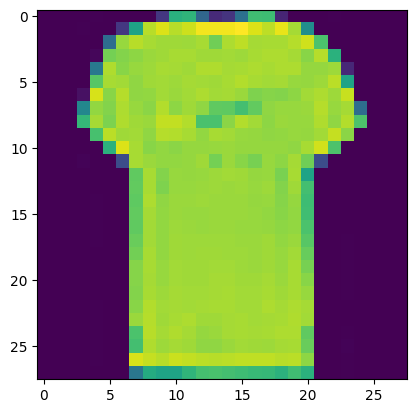

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
bag


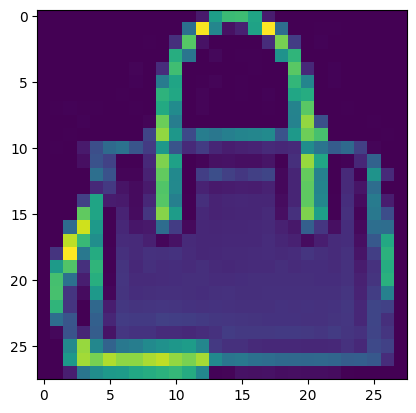

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
ankle_boots


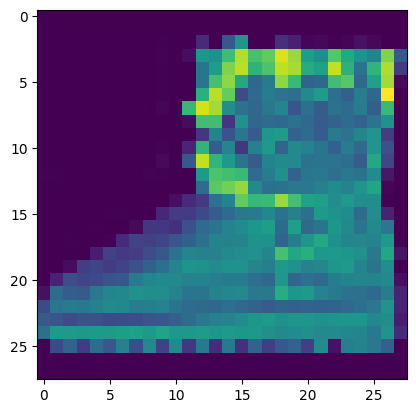

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
t_shirt


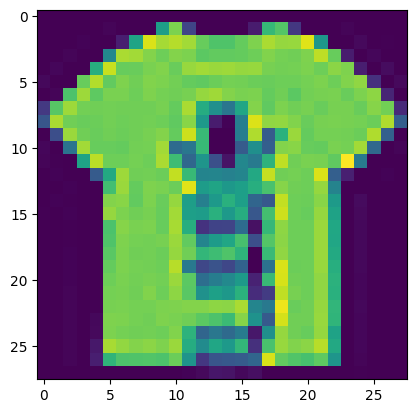

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
pullover


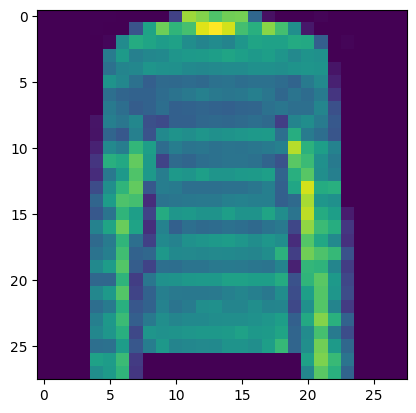

In [46]:
for i in range(10,15):
    predict(i)